# EXPLORATION 3. 카메라 스티커앱 만들기 첫걸음

### 일단 카메라 스티커 앱 만들기의 과정을 간단히 생각해보자!  
#### 1. 스티커를 붙이고 싶은 사진을 준비한다! (얼굴이 포함된 사진!)  
#### 2. 사진에서 얼굴의 bounding box를 먼저 찾는다!  
#### 3. 사진에서 얼굴 영역의 face landmark 를 찾아낸다!  
#### 4. 찾아낸 영역으로부터 원하는 위치에 스티커를 붙여보자!

## (1) 사진 준비하기

일단은 디렉토리를 만들고 .png로 저장된 사진을 가져온 후에 디렉토리에 저장하면 된다.

In [1]:
import os
import cv2
import matplotlib.pyplot as plt         ## 이미지 처리를 위해 opencv와 노트북에 이미지를 출력하기 위해서 matplotlib을 불러온다.
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


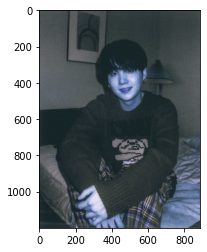

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.png'
img_bgr = cv2.imread(my_image_path)  
img_show = img_bgr.copy()      ## 출력용 이미지를 따로 보관한다!
plt.imshow(img_bgr)
plt.show()

위에 이미지를 출력하면 색상이 푸르스름 한 것을 볼 수 있다!

=> opencv 특징 때문인데 이러면 안 예쁘니까~ 그리고 원본처럼 RGB 로 바꿔줘야한다! (opencv 는 BGR 이라서 반대로 색이 출력)

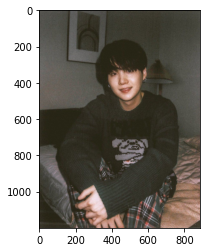

In [3]:
## plt.imshow 이전에 RGB 이미지로 바꿔줘야한다.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## (2) 얼굴의 bounding box 찾기

In [4]:
## dlib 을 활용해서 hog detector 을 선언하기

detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [5]:
## detector_hog 을 이용해서 얼굴의 bounding box 추출하기

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   ## opencv 의 BGR 이미지를 RGB 로 변환시켜줌
print("🌫🛸")
print(dlib_rects)

🌫🛸
rectangles[[(366, 284) (551, 469)]]


rectangles[[(366, 284) (551, 469)]]


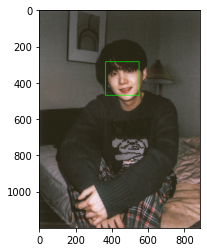

In [6]:
## 찾은 얼굴 영역 박스 리스트

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## (3) 사진에서 얼굴 영역의 face landmark 찾기

잘라진 얼굴 이미지에서 이목구비 위치는 68개의 점으로 이루어져있다.   

In [7]:
## 저장한 landmark 모델을 불러오기

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks)

## 랜드마크의 갯수를 프린트 시켜서 확인해보고, list_landmarks도 잘 저장되어있는지 확인해봄!!

68
[[(375, 367), (380, 392), (388, 415), (398, 437), (411, 457), (428, 473), (447, 487), (468, 498), (489, 499), (509, 491), (528, 476), (545, 457), (559, 435), (568, 411), (571, 384), (571, 356), (568, 328), (378, 341), (386, 327), (401, 319), (419, 317), (436, 321), (460, 315), (477, 306), (497, 301), (518, 303), (536, 312), (451, 340), (453, 358), (455, 376), (458, 394), (445, 410), (454, 412), (464, 412), (474, 407), (483, 403), (399, 353), (408, 344), (421, 342), (433, 349), (422, 355), (409, 357), (481, 340), (490, 329), (504, 327), (517, 331), (507, 339), (493, 342), (442, 441), (451, 435), (461, 430), (471, 430), (481, 426), (496, 426), (513, 426), (501, 444), (488, 453), (478, 457), (468, 457), (456, 453), (448, 442), (464, 437), (473, 436), (483, 433), (508, 429), (485, 442), (475, 444), (465, 445)]]


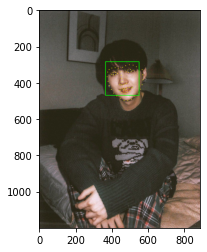

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

얼굴 bounding box에 랜드마크가 잘 찍혀있는 것을 확인할 수 있다!!!!

## (5) 스티커 적용하기

### 스티커를 얼굴에 예쁘게 집어넣기 위해서!  
### 1. 스티커의 위치를 잘 잡아줘야하고!  
### 2. 스티커의 크기를 얼굴에 알맞게 조절을 해줘야한다!

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) 
    x = landmark[33][0]          ## 코 끝 위치의 랜드마크가 33번이기 때문에! x를 [33][0] 으로 잡았다
    y = landmark[33][1]         ## 마찬가지로 y를 [33][1]으로 잡았다.
                                ## (x,y) 좌표를 설정해준다.
    w = h = dlib_rect.width()   ## 얼굴의 bounding box의 넓이와 높이를 각각 w, h 라고 잡는다!!!
    
    print ('(x,y) : (%d,%d)'%(x,y)) 
    print ('(w,h) : (%d,%d)'%(w,h))

(464, 412)
(x,y) : (464,412)
(w,h) : (186,186)


In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)             ##  준비 된 고양이 수염 스티커 이미지를 불러온다.
img_sticker = cv2.resize(img_sticker, (w,h))       ##  이미지를 불러온 다음에 얼굴크기에 맞춰서 resize를 해준다.
print (img_sticker.shape)

(186, 186, 3)


In [12]:
refined_x = x - w // 2           ## 이미지 스티커에 대한 refined_x, refined_y 를 정해준다. 
refined_y = y - h // 2           ## 이미지의 (0,0) 은 왼쪽 위라고 생각하고 좌표를 설정해주면 된다.!!
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (371,319)


In [13]:
## 사실 여기서는 이 코드가 필요가 없지만 (x,y) 가 음수가 되었을 때 경계면을 잘라주는 코드이다.
## 하지만 여기는 코 중간에 스티커가 가게되고 양수 값이라서 쓸모는 없지만 복습차원에서 작성해봄~(왕관이나 범위를 벗어나면 코드가 필요!)

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (371,319)


In [14]:
## 길어서 복잡해 보이지만 img_show[from:to] 형식이다.
refined_y_added = refined_y+img_sticker.shape[0]
refined_x_added = refined_x+img_sticker.shape[1]

sticker_area = img_show[refined_y:refined_y_added, refined_x:refined_x_added]
img_show[refined_y:refined_y_added, refined_x:refined_x_added] = np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


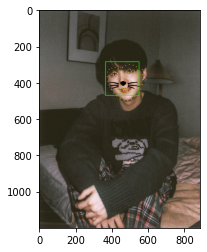

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

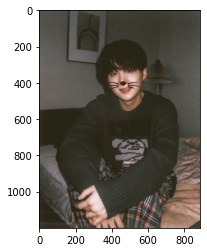

In [16]:
## 얼굴에 있었던 bounding box를 없애고 스티커 이미지를 불러와본다. 
## 잘 시행된 것을 볼 수 있고, cv2.addWeighted()함수를 사용해서 스티커이미지를 연하게 해서 원본 이미지랑 비슷하게 만들어줬다!
## 원래 0.5, 0.5 로 했지만 내가 고른 이미지가 색상들이 진해서 0.3, 0.7로 조금 진하게 해주었다.

sticker_area = img_bgr[refined_y:refined_y_added, refined_x:refined_x_added]
img_bgr[refined_y:refined_y_added, refined_x:refined_x_added] = \
    np.where(img_sticker!=0,sticker_area,cv2.addWeighted(sticker_area,0.3,img_sticker,0.7,0)).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## <어려웠던 점>

좌표로 코드를 짜보는게 처음이라서 처음에 감을 잡는데 시간이 걸렸다. x, y, w, h 가 각각 어떤 좌표를 의미하는 지를 알기 위해서 많은 시간이 걸렸던 것 같다. 하지만 조원들과 함께 찾아보며 이야기를 나누니 완전히!!!!! 깨닫게 되었고 다른 조원들께 설명할 수 있게 되었다. 또한, 원래 (0,0)기준점이 왼쪽 하단에 위치한 일반 좌표평면과는 달리! 좌표의 (0,0)인 기준점이 왼쪽 상단에 있으니, 생각하는데 어려움이 있었다. 그리고 np.where 이런 함수들을 실제로 다뤄본적이 없어서 더 어려웠던 것 같다.

## <알아낸점> !!!!!!!

이번에는 뭔가 코드 하나하나를 뜯어서 무슨 함수인지 어떤 좌표를 의미하는지 보려고 했더니 많은 것을 알게되었다. 좌표평면이라고 생각하니까 더 흥미가 생긴 만큼 각각 변수들이 의미하는 바를 알게된 것 같다. 또한 가장 중요한 np.where() 함수에 대해서 알게되었다.   
np.where() 함수는 일단 안에 적을 때! np.where(img_sticker!=0,sticker_area,img_sticker) 이렇게 있으면 np.where(조건문, 조건문이 참일 때, 조건문이 거짓일 때)라고 생각하면 된다. 그리고, np.where(img_sticker!=0,sticker_area,cv2.addWeighted(sticker_area,0.3,img_sticker,0.7,0)) 이 코드를 보면 np.where() 함수니까 똑같이 img_sticker 가 0이 아니다! 가 조건문이고! 조건문이 참이면 sticker_area를 찍게 되고! 아니면cv2함수를 따르면 된다. 
사실 처음에 사진을 연하게 하라고 했을 때 막막했는데 그런만큼 cv2함수에 대해 열심히 찾아보았다. cv2.addWeighted(sticker_area,0.3,img_sticker,0.7,0) 이 코드는 cv2.addWeighted(a, b, c, d, e) 라고 봤을 때 (a+b, c+d, e)로 보면 된다. e 인 감마는 우리가 변경시켜가면서 밝기등을 조절가능한 숫자이다.

## <시도한 것들>

cv2.addWeighted(sticker_area,0.3,img_sticker,0.7,0) 이 함수를 적을 때 0.5, 0.5 를 대입해봤는데 내가 고른 사진 자체가 어둡고 색감이 찐해서 조절해가면서 적당한 값을 대입했다. 그리고 이미지 스티커 고양이 수염을 붙일 때 바로 찾아보지 않고 스티커의 좌표를 천천히 변경해가면서 어떻게 변해가는지에 대해서 공부를 했다. 그리고 좌표만 바꾸고 run을 하니까 수염이 여러개 생겨 before과 after 을 비교해가면서 좌표 평면을 이해해가는데 도움이 되었던 것 같다.

## <자기다짐>

사실 이번에 이미지라서 더 재밌었던 것 같고! 또 좋아하는 이미지를 선택해서 하니까 더욱 흥미가 생겨서 열심히 했던 것 같다. 이번 노드처럼 모르는 코드나 함수에 대해서 넘어가지 않고 꼼꼼히 살펴보면서 코드를 해석해봐도 좋을 것 같다. 모르는 것을 너무 오래 붙들어서 힘들지 않을 정도만 찾아보고 또 내가 깨달았던 것을 남에게 설명해주면서 공부를 하니까 한 번더 이해가 된 것 같고 재밌었다. 앞으로도 이번 노드처럼 한 가지 함수라도 정확히 알고 넘어갔으면 좋겠고 화이팅!!!!!!!!!!!!!!!!!!!!!!!!!